# Spam Detection Model using NLP

The data used is a dataset from UCI Datasets that contains over 5 thousand text messages. This model uses nltk library and a customized pipeline to predict whether a text message is ham or spam.

In [24]:
import nltk
locn = 'smsspamcollection/SMSSpamCollection'

In [25]:
#nltk.download_shell()

In [26]:
messages = [line.rstrip() for line in open(locn)]

In [47]:
messages[:3]

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [29]:
print(len(messages))

5574


In [30]:
for num, message in enumerate(messages[:10]):
    print(num, message + '\n')
    

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

In [31]:
import pandas as pd

messages = pd.read_csv(locn, sep='\t',
                      names = ['label', 'message'])

In [32]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


The number of messages is less than the number of unique messages. This could be due to common messages like 'yes', 'no', or promotional messages.

In [36]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [37]:
messages['length'] = messages['message'].apply(len)

In [38]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='length', ylabel='Count'>

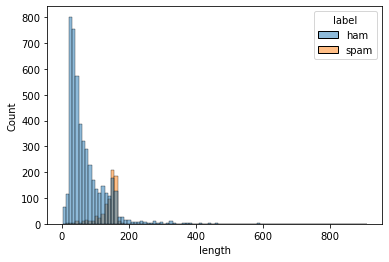

In [45]:
sns.histplot(data=messages, x='length', hue='label')

spam messages tend to have more words.

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

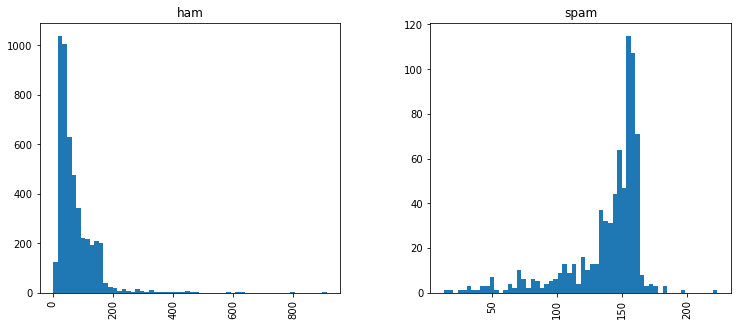

In [46]:
messages.hist(column='length', by='label', bins = 60, figsize=(12,5))

Ham messages are centered about 50 and spam around 150. So length is a good measure to differentiate between ham and spam.

In [48]:
import string

In [50]:
#string.punctuation

In [51]:
from nltk.corpus import stopwords

In [52]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

We will try to remove the common words that will not be useful in differentiating messages

In [66]:
def clean_message(message):
    no_punc = ''.join(char for char in message if char not in string.punctuation)
    imp_words = [word for word in no_punc.split() if word not in stopwords.words('english')]
    return imp_words

In [67]:
clean_message(messages['message'][3])

['U', 'dun', 'say', 'early', 'hor', 'U', 'c', 'already', 'say']

Convert messages into vectors that the machine learning model can work with

perform countvectorization

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

In [121]:
from sklearn.feature_extraction.text import TfidfTransformer

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)



In [126]:
from sklearn.pipeline import Pipeline

In [127]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_message)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [128]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_message at 0x7fe014da44c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [129]:
pred = pipeline.predict(X_test)

In [130]:
from sklearn.metrics import classification_report

In [131]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1446
        spam       1.00      0.69      0.82       226

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

